In [150]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from cartopy import crs as ccrs

In [151]:

def mercator_y(lat):
    """Convert latitude to Mercator y-coordinate."""
    return np.log(np.tan(np.pi/4 + np.radians(lat)/2))


def inverse_mercator_lat(y):
    """Convert Mercator y-coordinate back to latitude."""
    return np.degrees(2 * np.arctan(np.exp(y)) - np.pi/2)


def sample_mercator_points(num_points=1000):
    """Sample random points in Mercator projection space, and
    project them back to latitude and longitude."""
    x = np.random.uniform(-np.pi, np.pi, num_points)
    y = np.random.uniform(-mercator_y(85), mercator_y(85), num_points)
    lons = np.degrees(x)
    lats = inverse_mercator_lat(y)
    return lons, lats


In [152]:
def plot_projection(proj=ccrs.PlateCarree()):
    """Create plots to explore Mercator projection properties with custom layout."""
    fig = plt.figure(figsize=(10, 10))
    
    # Create GridSpec with custom widths and heights
    gs = GridSpec(2, 2, figure=fig, 
                  width_ratios=[1, 6], 
                  height_ratios=[1, 0.3], 
                  hspace=0.3, wspace=0.3)

    # Plot 1: Narrow left column
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_title("Narrow Left")

    # Plot 2: Main plot (upper right)
    ax2 = fig.add_subplot(gs[0, 1], projection=proj)
    ax2.set_title("Main Plot")
    # ... (add content for ax2)

    # Plot 3: Plate Carree projection (lower left)
    ax3 = fig.add_subplot(gs[1, 0])

    # Plot 4: Narrow bottom row
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.set_title("Narrow Bottom")
    return fig, np.array([[ax1, ax2], [ax3, ax4]])


/var/folders/7c/k9ztpxkn35s1mbm2kjthjwz80000gn/T/ipykernel_14678/861667021.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


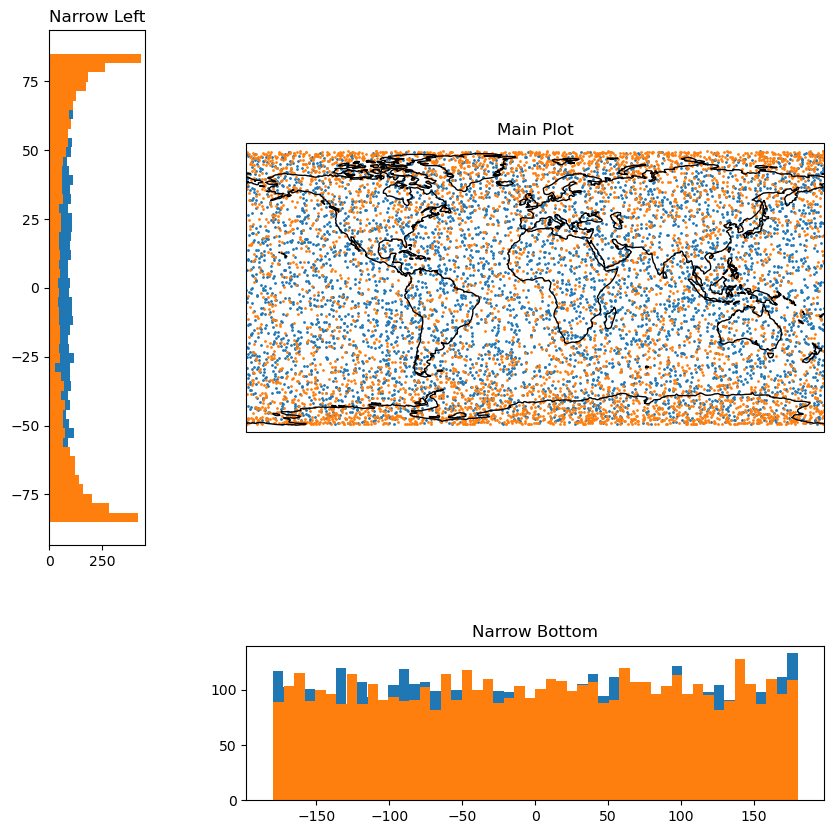

In [153]:
# Sample randomly from 2d space (-90, 90) , (-180, 180)
x1 = np.random.uniform(-180, 180, 5000)
y1 = np.random.uniform(-85, 85, 5000)

x2, y2 = sample_mercator_points(5000)

fig, axes = plot_projection()

# Plot the data
axes[0, 1].scatter(x1, y1, s=1)
axes[0, 1].scatter(x2, y2, s=1)
# Add coastlines
axes[0, 1].coastlines()

# Plot latitude histograms
axes[0, 0].hist(y1, bins=50, orientation='horizontal')
axes[0, 0].hist(y2, bins=50, orientation='horizontal')

# Plot longitude histograms
axes[1, 1].hist(x1, bins=50)
axes[1, 1].hist(x2, bins=50)

axes[1, 0].axis('off')
plt.tight_layout()